In [1]:
# Below is a bit of code to look at the environment variables in Python
# This is useful to see what is in the environment and to see if the PYTHONPATH
# is set properly

#print the value of $PYTHONPATH
import os
print("PYTHONPATH: ", os.environ.get('PYTHONPATH'))
print("-----------------")

#update the value of $PYTHONPATH
# get and store the value of $ROOTSYS
ROOTSYS = os.environ.get('ROOTSYS')

# update the value of $PYTHONPATH
# The following is for root installed via homebrew on MacOS
#os.environ['PYTHONPATH'] = ROOTSYS + '/Cellar/root/6.32.02/lib/root'
# The following is for root installed from source on MacOS under one's home directory
os.environ['PYTHONPATH'] = ROOTSYS + '/lib'

# print the updated value of $PYTHONPATH
print("Updated PYTHONPATH: ", os.environ.get('PYTHONPATH'))

# In order for the following code to work, you need to have ROOT installed, and the Jupyter Server in PyCharm
# needs to be configured to set the PYTHONPATH to correct value.  On MacOS, with root installed via homebrew, the
# PYTHONPATH should be set to /usr/local/Cellar/root/6.32.02/lib/root (or whatever version of root you have installed).  
# If root is installed in a different location, you will need to set the PYTHONPATH to that location.
#
# To configure the PyCharm Jupyter server, click on the server pulldown in the upper right corner, and select
# Configure Jupyter Server.  In the dialog box that appears, set the PYTHONPATH to the correct value.
# You will probably have to quit and restart PyCharm for the changes to take effect.

# I note that one can also execute this notebook by doing 'root --notebook' from the command line, and then
# opening the notebook in the browser.  This will also set the PYTHONPATH correctly.

PYTHONPATH:  /Users/brash/root/lib:/Users/brash/CDetMC
-----------------
Updated PYTHONPATH:  /Users/brash/root/lib


In [2]:
import ROOT as root
import numpy as np
import random
from timer import Timer

t = Timer()
t.start()

objc[11782]: Class RunStopper is implemented in both /Users/brash/root/lib/libCore.so (0x1056de148) and /Users/brash/anaconda3/envs/phys441/lib/libCore.6.28.00.so (0x1211cfc20). One of the two will be used. Which one is undefined.


In [3]:
# Additional code to look at the environment variables in Python
# Specifically, this looks at the sys.path variable, which is the list of directories
# that Python searches for modules when you do an import statement.

print("Environment:")
print("-----------------")

sys_values = True
if (sys_values):
    import sys
    print("sys.executable: ", sys.executable)
    print("-----------------")
    from pprint import pprint as p
    p(sys.path)

print("-----------------")



Environment:
-----------------
sys.executable:  /Users/brash/anaconda3/envs/phys441/bin/python
-----------------
['/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug',
 '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev',
 '/Users/brash/CDetMC/analysis',
 '/Users/brash/root/lib',
 '/Users/brash/CDetMC',
 '/Users/brash/anaconda3/envs/phys441/lib/python311.zip',
 '/Users/brash/anaconda3/envs/phys441/lib/python3.11',
 '/Users/brash/anaconda3/envs/phys441/lib/python3.11/lib-dynload',
 '',
 '/Users/brash/anaconda3/envs/phys441/lib/python3.11/site-packages']
-----------------


In [4]:
fileName1 = "data/AnaBarMC_9991.root"
fileName2 = "data/AnaBarMC_9992.root"
treeName = "T"

f1 = root.TFile(fileName1)
f2 = root.TFile(fileName2)
myTree1 = f1.Get(treeName)
myTree2 = f2.Get(treeName)

myTree1.Print()
myTree2.Print()

root.EnableImplicitMT()
d1 = root.RDataFrame(treeName,fileName1)
d2 = root.RDataFrame(treeName,fileName2)

myGeometryData1 = myTree1.GetUserInfo().FindObject("myGeometryData")
myGeometryData2 = myTree2.GetUserInfo().FindObject("myGeometryData")


******************************************************************************
*Tree    :T         : Output Tree                                            *
*Entries :    59921 : Total =     24181436115 bytes  File  Size =  250706552 *
*        :          : Tree compression factor =  96.77                       *
******************************************************************************
*Br    0 :Prim_E    : Prim_E/F                                               *
*Entries :    59921 : Total  Size=     245393 bytes  File Size  =     192714 *
*Baskets :       60 : Basket Size=      32000 bytes  Compression=   1.27     *
*............................................................................*
*Br    1 :Prim_X    : Prim_X/F                                               *
*Entries :    59921 : Total  Size=     245393 bytes  File Size  =     156275 *
*Baskets :       60 : Basket Size=      32000 bytes  Compression=   1.56     *
*...................................................

In [5]:
#myGeometryData1.Print()
print("Geometry Data 1")
print(myGeometryData1[0])
print(myGeometryData1[0][0])
print(myGeometryData1[0][1])
print(myGeometryData1[0][2])
print(myGeometryData1[0][3])
print(myGeometryData1[1][0])
print(myGeometryData1[1][1])
print(myGeometryData1[1][2])
print(myGeometryData1[1][3])
print(len(myGeometryData1))
type(myGeometryData1)

#myGeometryData2.Print()
print("Geometry Data 2")
print(myGeometryData2[0])
print(myGeometryData2[0][0])
print(myGeometryData2[0][1])
print(myGeometryData2[0][2])
print(myGeometryData2[0][3])
print(myGeometryData2[1][0])
print(myGeometryData2[1][1])
print(myGeometryData2[1][2])
print(myGeometryData2[1][3])
print(len(myGeometryData2))
type(myGeometryData2)

root.gInterpreter.ProcessLine('#include "AnalyseSignalsRDataFrameNoKE.h"')


Geometry Data 1
Name: TVectorT<double> Title: 
0.0
450.0
0.0
1497.5
1.0
450.0
0.0
1492.0999755859375
2352
Geometry Data 2
Name: TVectorT<double> Title: 
0.0
450.0
0.0
1497.5
1.0
450.0
0.0
1492.0999755859375
2352


0

In [6]:
fdf1 = d1.Define("trigger", "getTrigger(Detector_Nhits, &Detector_id[0])") \
       .Define("fMass", "getMass(Prim_pdg)") \
       .Define("fMomentum","getMomentum(Prim_E,fMass)") \
       .Define("fPx", "getPx(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPy", "getPy(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPz", "getPz(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fNewTheta", "getNewTheta(fMomentum,fPy)") \
       .Define("fNewPhi", "getNewPhi(fMomentum,fPx,fPz)") \
       .Define("trigger2", "getTrigger2(trigger,fNewTheta)") \
       .Define("trigger3", "getTrigger3(trigger,fNewTheta)") \
       .Define("fingerXVec","getFingerXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("fingerYVec","getFingerYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("fingerZVec","getFingerZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("fingerTVec","getFingerTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("anaBarXVec","getAnaBarXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("anaBarYVec","getAnaBarYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("anaBarZVec","getAnaBarZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("anaBarTVec","getAnaBarTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("fingerID","getFingerID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("fingerPDG","getFingerPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarID","getAnaBarID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPDG","getAnaBarPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPMTID","getAnaBarPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTID","getFingerPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTNPhotons","getFingerPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarPMTNPhotons","getAnaBarPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarXPMT","getAnaBarXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarZPMT","getAnaBarZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPXPMT","getAnaBarPXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPZPMT","getAnaBarPZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTime","getAnaBarPMTTime(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeTop","getAnaBarPMTTimeTop(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeBottom","getAnaBarPMTTimeBottom(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarNPhotonsTotal","getAnaBarNPhotonsTotal(trigger,&PMT_Nphotons[0])") \
       .Define("imult","getAnaBarMult(trigger,&PMT_Nphotons[0])") \
       .Define("fingerEd","getFingerEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEd","getAnaBarEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEdTotal","getAnaBarEdTotal(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])")

triggers = fdf1.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft1 = fdf1.Filter("trigger==true")

59918 entries passed trigger


In [7]:
fdf2 = d2.Define("trigger", "getTrigger(Detector_Nhits, &Detector_id[0])") \
       .Define("fMass", "getMass(Prim_pdg)") \
       .Define("fMomentum","getMomentum(Prim_E,fMass)") \
       .Define("fPx", "getPx(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPy", "getPy(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fPz", "getPz(fMomentum,Prim_Th,Prim_Ph)") \
       .Define("fNewTheta", "getNewTheta(fMomentum,fPy)") \
       .Define("fNewPhi", "getNewPhi(fMomentum,fPx,fPz)") \
       .Define("trigger2", "getTrigger2(trigger,fNewTheta)") \
       .Define("trigger3", "getTrigger3(trigger,fNewTheta)") \
       .Define("fingerXVec","getFingerXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("fingerYVec","getFingerYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("fingerZVec","getFingerZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("fingerTVec","getFingerTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("anaBarXVec","getAnaBarXVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_x[0],Prim_pdg)") \
       .Define("anaBarYVec","getAnaBarYVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_y[0],Prim_pdg)") \
       .Define("anaBarZVec","getAnaBarZVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_z[0],Prim_pdg)") \
       .Define("anaBarTVec","getAnaBarTVec(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0],&Detector_t[0],Prim_pdg)") \
       .Define("fingerID","getFingerID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("fingerPDG","getFingerPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarID","getAnaBarID(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPDG","getAnaBarPDG(trigger,Detector_Nhits,&Detector_id[0],&Detector_pdg[0])") \
       .Define("anaBarPMTID","getAnaBarPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTID","getFingerPMTID(trigger,&PMT_Nphotons[0])") \
       .Define("fingerPMTNPhotons","getFingerPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarPMTNPhotons","getAnaBarPMTNPhotons(trigger,&PMT_Nphotons[0])") \
       .Define("anaBarXPMT","getAnaBarXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarZPMT","getAnaBarZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPXPMT","getAnaBarPXPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPZPMT","getAnaBarPZPMT(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTime","getAnaBarPMTTime(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeTop","getAnaBarPMTTimeTop(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarPMTTimeBottom","getAnaBarPMTTimeBottom(trigger,&PMT_Nphotons[0],&PMT_Time[0])") \
       .Define("anaBarNPhotonsTotal","getAnaBarNPhotonsTotal(trigger,&PMT_Nphotons[0])") \
       .Define("imult","getAnaBarMult(trigger,&PMT_Nphotons[0])") \
       .Define("fingerEd","getFingerEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEd","getAnaBarEd(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])") \
       .Define("anaBarEdTotal","getAnaBarEdTotal(trigger,fNewTheta,Detector_Nhits,Prim_pdg,&Detector_id[0],&Detector_pdg[0],&Detector_Ed[0])")

triggers = fdf2.Filter("trigger==true").Count()
print('{} entries passed trigger'.format(triggers.GetValue()))

fdft2 = fdf2.Filter("trigger==true")


59837 entries passed trigger


Number of entries GEANT4 v10: 102031.0
Number of entries GEANT4 v11: 173619.0


Info in <TCanvas::Print>: pdf file plots/c1RA.pdf has been created


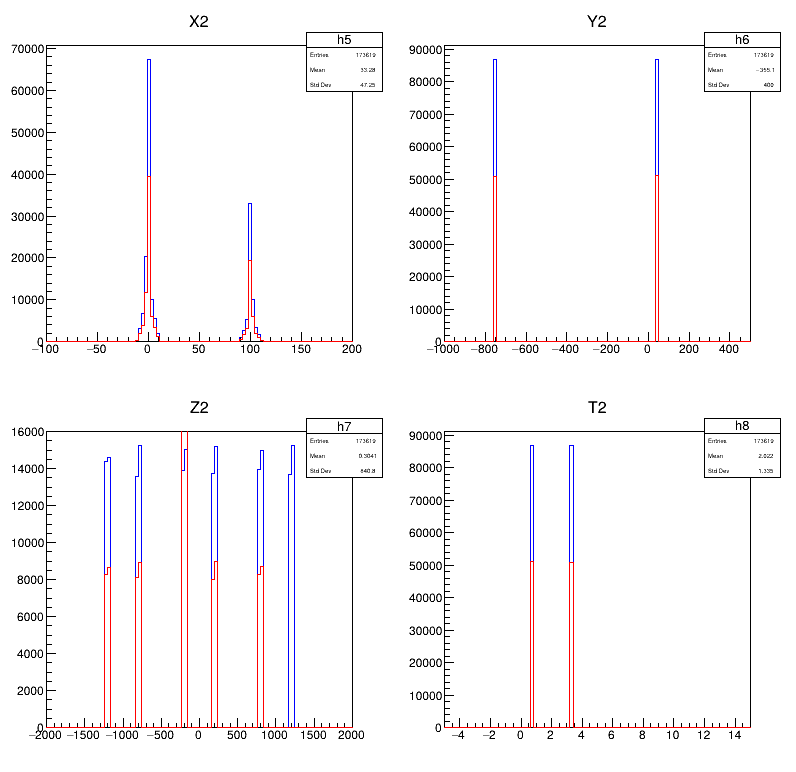

In [8]:
# Canvas 1

hFingerX1 = fdft1.Histo1D(("h1", "X1", 100, -100.0, 200.0),'fingerXVec')
hFingerY1 = fdft1.Histo1D(("h2", "Y1", 100, -1000.0, 500.0),'fingerYVec')
hFingerZ1 = fdft1.Histo1D(("h3", "Z1", 100, -2000.0, 2000.0),'fingerZVec')
hFingerT1 = fdft1.Histo1D(("h4", "T1", 100, -5.0, 15.0),'fingerTVec')
hFingerX2 = fdft2.Histo1D(("h5", "X2", 100, -100.0, 200.0),'fingerXVec')
hFingerY2 = fdft2.Histo1D(("h6", "Y2", 100, -1000.0, 500.0),'fingerYVec')
hFingerZ2 = fdft2.Histo1D(("h7", "Z2", 100, -2000.0, 2000.0),'fingerZVec')
hFingerT2 = fdft2.Histo1D(("h8", "T2", 100, -5.0, 15.0),'fingerTVec')

c1 = root.TCanvas("c1","c1",800,800)
c1.Divide(2,2,0.01,0.01,0)

c1.cd(1)
hFingerX2.SetLineColor(4)
hFingerX2.Draw()
hFingerX1.SetLineColor(2)
hFingerX1.Draw("SAME")

c1.cd(2)
hFingerY2.SetLineColor(4)
hFingerY2.Draw()
hFingerY1.SetLineColor(2)
hFingerY1.Draw("SAME")

c1.cd(3)
hFingerZ2.SetLineColor(4)
hFingerZ2.Draw()
hFingerZ1.SetLineColor(2)
hFingerZ1.Draw("SAME")

c1.cd(4)
hFingerT2.SetLineColor(4)
hFingerT2.Draw()
hFingerT1.SetLineColor(2)
hFingerT1.Draw("SAME")


print(f"Number of entries GEANT4 v10: {hFingerX1.GetEntries()}")
print(f"Number of entries GEANT4 v11: {hFingerX2.GetEntries()}")

c1.Draw()
c1.Print("plots/c1RA.pdf");

Number of entries GEANT4 v10: 59918.0
Number of entries GEANT4 v11: 59837.0


Info in <TCanvas::Print>: pdf file plots/c2RA.pdf has been created


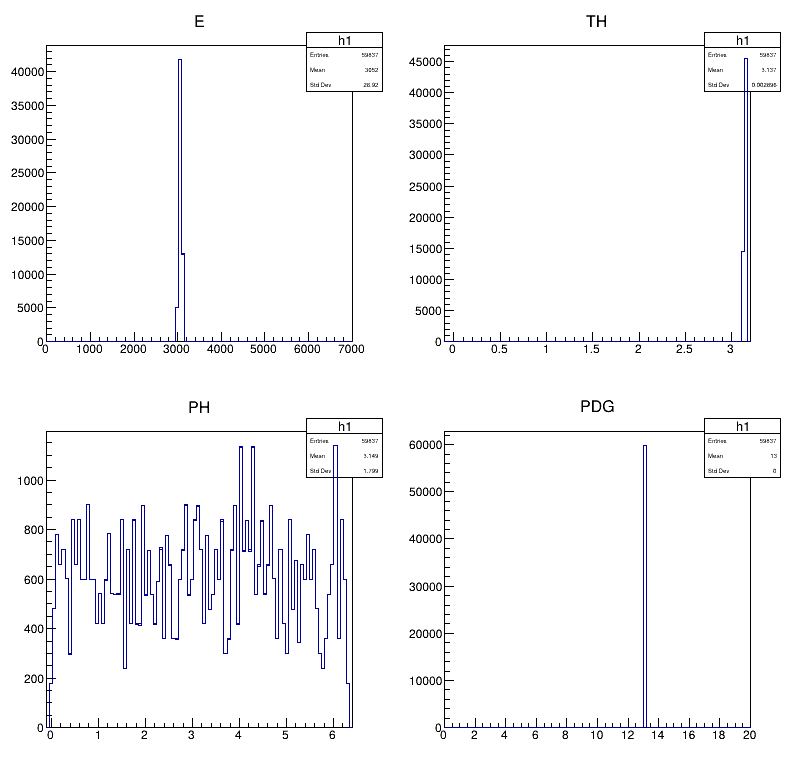

In [9]:
# Canvas 2

hPrimE1 = fdft1.Histo1D(("h1", "E", 100, 0.0, 7000.0),'Prim_E')
hPrimTh1 = fdft1.Histo1D(("h1", "TH", 100, -0.1, 3.2),'fNewTheta')
hPrimPh1 = fdft1.Histo1D(("h1", "PH", 100, -0.1, 6.4),'fNewPhi')
hPrimPdg1 = fdft1.Histo1D(("h1", "PDG", 100, 0.0, 20.0),'Prim_pdg')
hPrimE2 = fdft2.Histo1D(("h1", "E", 100, 0.0, 7000.0),'Prim_E')
hPrimTh2 = fdft2.Histo1D(("h1", "TH", 100, -0.1, 3.2),'fNewTheta')
hPrimPh2 = fdft2.Histo1D(("h1", "PH", 100, -0.1, 6.4),'fNewPhi')
hPrimPdg2 = fdft2.Histo1D(("h1", "PDG", 100, 0.0, 20.0),'Prim_pdg')

c2 = root.TCanvas("c2","c2",800,800)
c2.Divide(2,2,0.01,0.01,0)

c2.cd(1)
hPrimE2.Draw()
hPrimE1.Draw("SAME")
c2.cd(2)
hPrimTh2.Draw()
hPrimTh1.Draw("SAME")
c2.cd(3)
hPrimPh2.Draw()
hPrimPh1.Draw("SAME")
c2.cd(4)
hPrimPdg2.Draw()
hPrimPdg1.Draw("SAME")

print(f"Number of entries GEANT4 v10: {hPrimE1.GetEntries()}")
print(f"Number of entries GEANT4 v11: {hPrimE2.GetEntries()}")

c2.Draw()
c2.Print("plots/c2RA.pdf")


Number of entries Detector_Nhits GEANT4 v10: 59918.0
Number of entries Detector_Nhits GEANT4 v11: 59837.0
Number of entries PMT_ID GEANT4 v10: 59918.0
Number of entries PMT_ID GEANT4 v11: 59837.0


Info in <TCanvas::Print>: pdf file plots/c3RA.pdf has been created


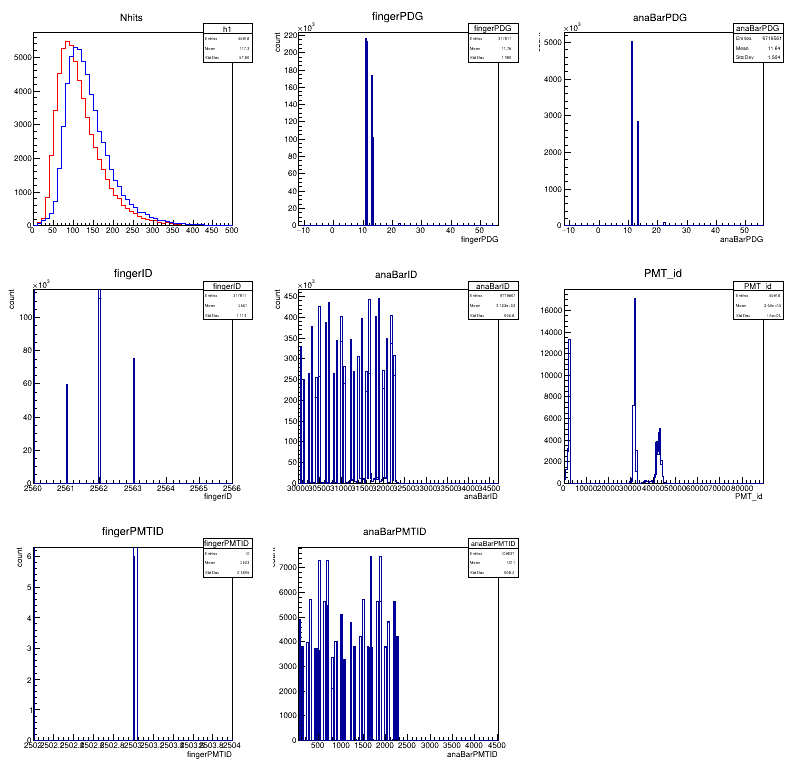

In [10]:
def plotSinglePoints(hist):

    x1 = 60.0;
    y1 = 115.0;
    x2 = 70.0;
    y2 = 125.0;
    opacity = 0.9;
    rect7 = root.TBox(x1, y1, x2, y2);
    rect7.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect7);
    x1 = 60.0;
    y1 = -115.0;
    x2 = 70.0;
    y2 = -125.0;
    opacity = 0.9;
    rect8 = root.TBox(x1, y1, x2, y2);
    rect8.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect8);
    x1 = -35.0;
    y1 = -5.0;
    x2 = -45.0;
    y2 = 5.0;
    opacity = 0.9;
    rect9 = root.TBox(x1, y1, x2, y2);
    rect9.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect9);
    x1 = -5.0;
    y1 = 55.0;
    x2 = 5.0;
    y2 = 65.0;
    opacity = 0.9;
    rect10 = root.TBox(x1, y1, x2, y2);
    rect10.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect10);
    x1 = -5.0;
    y1 = -55.0;
    x2 = 5.0;
    y2 = -65.0;
    opacity = 0.9;
    rect11 = root.TBox(x1, y1, x2, y2);
    rect11.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect11);
    x1 = 25.0;
    y1 = -85.0;
    x2 = 35.0;
    y2 = -95.0;
    opacity = 0.9;
    rect12 = root.TBox(x1, y1, x2, y2);
    rect12.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect12);
    x1 = 25.0;
    y1 = 85.0;
    x2 = 35.0;
    y2 = 95.0;
    opacity = 0.9;
    rect13 = root.TBox(x1, y1, x2, y2);
    rect13.SetFillColorAlpha(3, opacity);
    hist.GetListOfFunctions().Add(rect13);

def plotDetector(hist):
    
    opacity=0.2
    x1 = 55.0
    y1 = -61.6
    x2 = -45.2
    y2 = -8.74
    rect1 = root.TBox(x1, y1, x2, y2)
    rect1.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect1)
    x1 = 55.0
    y1 = -8.74
    x2 = -45.2
    y2 = 44.14
    rect2 = root.TBox(x1, y1, x2, y2)
    rect2.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect2)
    x1 = 62.5
    y1 = -114.54
    x2 = -37.7
    y2 = -61.62
    rect3 = root.TBox(x1, y1, x2, y2)
    rect3.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect3)
    x1 = 70.0
    y1 = -167.46
    x2 = -30.2
    y2 = -114.54
    rect4 = root.TBox(x1, y1, x2, y2);
    rect4.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect4);
    x1 = 62.5
    y1 = 44.14
    x2 = -37.7
    y2 = 97.50
    rect5 = root.TBox(x1, y1, x2, y2)
    rect5.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect5)
    x1 = 70.0
    y1 = 97.50
    x2 = -30.2
    y2 = 150.0
    rect6 = root.TBox(x1, y1, x2, y2)
    rect6.SetFillColorAlpha(2, opacity)
    hist.GetListOfFunctions().Add(rect6)

# Canvas 3

hDetectorNhits1 = fdft1.Histo1D(("h1", "Nhits", 50, 0.0, 500.0),'Detector_Nhits')
hDetectorPdg1 = fdft1.Histo1D('anaBarPDG')
hDetectorID1 = fdft1.Histo1D('anaBarID')
hFingerPdg1 = fdft1.Histo1D('fingerPDG')
hFingerID1 = fdft1.Histo1D('fingerID')
hPMTID1 = fdft1.Histo1D('PMT_id')
hAnaBarPMTID1 = fdft1.Histo1D('anaBarPMTID')
hFingerPMTID1 = fdft1.Histo1D('fingerPMTID')

hDetectorNhits2 = fdft2.Histo1D(("h1", "Nhits", 50, 0.0, 500.0),'Detector_Nhits')
hDetectorPdg2 = fdft2.Histo1D('anaBarPDG')
hDetectorID2 = fdft2.Histo1D('anaBarID')
hFingerPdg2 = fdft2.Histo1D('fingerPDG')
hFingerID2 = fdft2.Histo1D('fingerID')
hPMTID2 = fdft2.Histo1D('PMT_id')
hAnaBarPMTID2 = fdft2.Histo1D('anaBarPMTID')
hFingerPMTID2 = fdft2.Histo1D('fingerPMTID')

c3 = root.TCanvas("c3","c3",800,800)
c3.Divide(3,3,0.01,0.01,0)

c3.cd(1)
hDetectorNhits1.SetLineColor(2)
hDetectorNhits1.Draw()
hDetectorNhits2.SetLineColor(4)
hDetectorNhits2.Draw("SAME")
c3.cd(2)
hFingerPdg1.Draw()
hFingerPdg2.Draw("SAME")
c3.cd(3)
hDetectorPdg1.Draw()
hDetectorPdg2.Draw("SAME")
c3.cd(4)
hFingerID1.Draw()
hFingerID2.Draw("SAME")
c3.cd(5)
hDetectorID1.Draw()
hDetectorID2.Draw("SAME")
c3.cd(6)
hPMTID1.Draw()
hPMTID2.Draw("SAME")
c3.cd(7)
hFingerPMTID1.Draw()
hFingerPMTID2.Draw("SAME")
c3.cd(8)
hAnaBarPMTID1.Draw()
hAnaBarPMTID2.Draw("SAME")

print(f"Number of entries Detector_Nhits GEANT4 v10: {hDetectorNhits1.GetEntries()}")
print(f"Number of entries Detector_Nhits GEANT4 v11: {hDetectorNhits2.GetEntries()}")
print(f"Number of entries PMT_ID GEANT4 v10: {hPMTID1.GetEntries()}")
print(f"Number of entries PMT_ID GEANT4 v11: {hPMTID2.GetEntries()}")
c3.Draw()
c3.Print("plots/c3RA.pdf")


Number of entries PMT Time GEANT4 v10: 109537.0
Number of entries PMT Time GEANT4 v11: 108776.0


Info in <TCanvas::Print>: pdf file plots/c33RA.pdf has been created


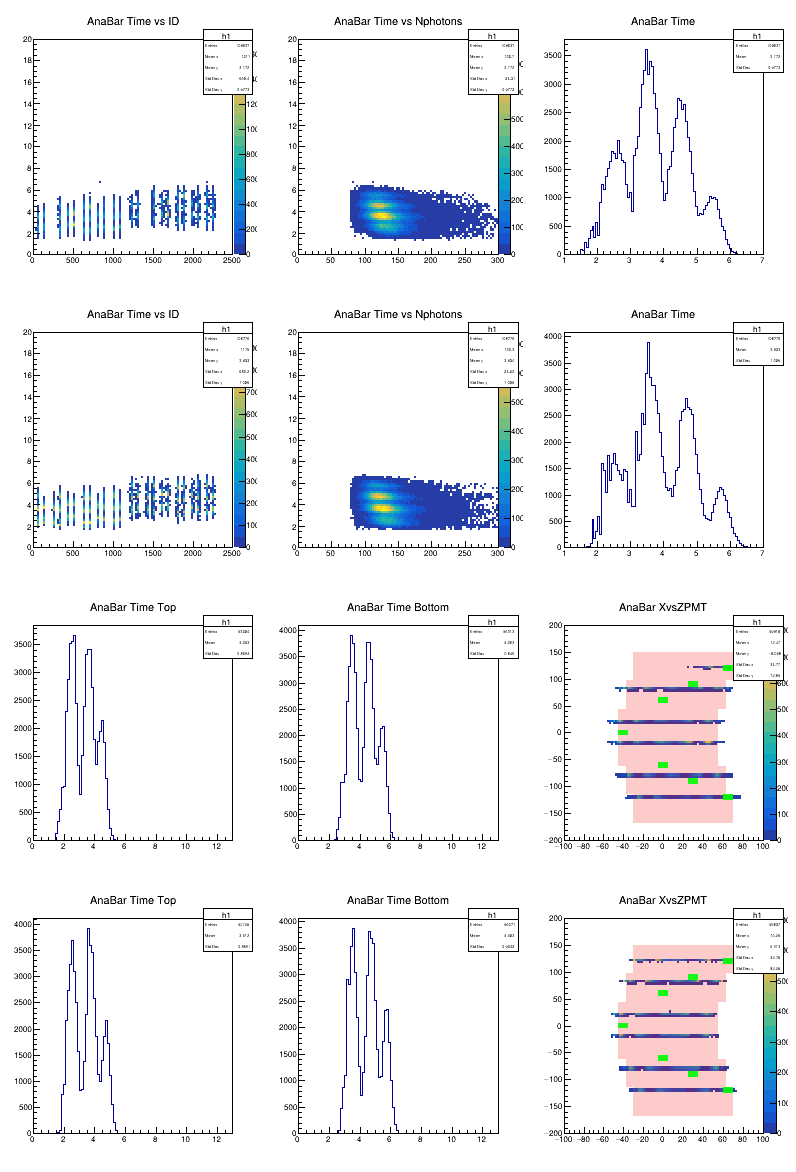

In [11]:
# Canvas 33
hAnaBarPMTTime_vs_ID1 = fdft1.Histo2D(("h1", "AnaBar Time vs ID", 100, 0.0, 2500.0,100,0.0,20.0),'anaBarPMTID','anaBarPMTTime')
hAnaBarPMTTime1 = fdft1.Histo1D(("h1", "AnaBar Time", 100, 1.0, 7.0),'anaBarPMTTime')
hAnaBarPMTTimeTop1 = fdft1.Histo1D(("h1", "AnaBar Time Top", 100, 0.0, 13.0),'anaBarPMTTimeTop')
hAnaBarPMTTimeBottom1 = fdft1.Histo1D(("h1", "AnaBar Time Bottom", 100, 0.0, 13.0),'anaBarPMTTimeBottom')
hAnaBarPMTTime_vs_Nphoton1 = fdft1.Histo2D(("h1", "AnaBar Time vs Nphotons", 100, 0.0, 300.0,100,0.0,20.0),'anaBarPMTNPhotons','anaBarPMTTime')
hAnaBarXZPMT1 = fdft1.Histo2D(("h1","AnaBar XvsZPMT",100,-100.0,100.0,100,-200,200),"anaBarXPMT","anaBarZPMT");

hAnaBarPMTTime_vs_ID2 = fdft2.Histo2D(("h1", "AnaBar Time vs ID", 100, 0.0, 2500.0,100,0.0,20.0),'anaBarPMTID','anaBarPMTTime')
hAnaBarPMTTime2 = fdft2.Histo1D(("h1", "AnaBar Time", 100, 1.0, 7.0),'anaBarPMTTime')
hAnaBarPMTTimeTop2 = fdft2.Histo1D(("h1", "AnaBar Time Top", 100, 0.0, 13.0),'anaBarPMTTimeTop')
hAnaBarPMTTimeBottom2 = fdft2.Histo1D(("h1", "AnaBar Time Bottom", 100, 0.0, 13.0),'anaBarPMTTimeBottom')
hAnaBarPMTTime_vs_Nphoton2 = fdft2.Histo2D(("h1", "AnaBar Time vs Nphotons", 100, 0.0, 300.0,100,0.0,20.0),'anaBarPMTNPhotons','anaBarPMTTime')
hAnaBarXZPMT2 = fdft2.Histo2D(("h1","AnaBar XvsZPMT",100,-100.0,100.0,100,-200,200),"anaBarXPMT","anaBarZPMT");

c33 = root.TCanvas("c33","c33",800,1200)
c33.Divide(3,4,0.01,0.01,0)

c33.cd(1)
hAnaBarPMTTime_vs_ID1.Draw("COLZ")
c33.cd(2)
hAnaBarPMTTime_vs_Nphoton1.Draw("COLZ")
c33.cd(3)
hAnaBarPMTTime1.Draw()

c33.cd(4)
hAnaBarPMTTime_vs_ID2.Draw("COLZ")
c33.cd(5)
hAnaBarPMTTime_vs_Nphoton2.Draw("COLZ")
c33.cd(6)
hAnaBarPMTTime2.Draw()

c33.cd(7)
hAnaBarPMTTimeTop1.Draw()
c33.cd(8)
hAnaBarPMTTimeBottom1.Draw()
c33.cd(9)
hAnaBarXZPMT1.Draw("COLZ")
plotDetector(hAnaBarXZPMT1)
plotSinglePoints(hAnaBarXZPMT1)

c33.cd(10)
hAnaBarPMTTimeTop2.Draw()
c33.cd(11)
hAnaBarPMTTimeBottom2.Draw()
c33.cd(12)
hAnaBarXZPMT2.Draw("COLZ")
plotDetector(hAnaBarXZPMT2)
plotSinglePoints(hAnaBarXZPMT2)

print(f"Number of entries PMT Time GEANT4 v10: {hAnaBarPMTTime1.GetEntries()}")
print(f"Number of entries PMT Time GEANT4 v11: {hAnaBarPMTTime2.GetEntries()}")

c33.Draw()
c33.Print("plots/c33RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c34RA.pdf has been created


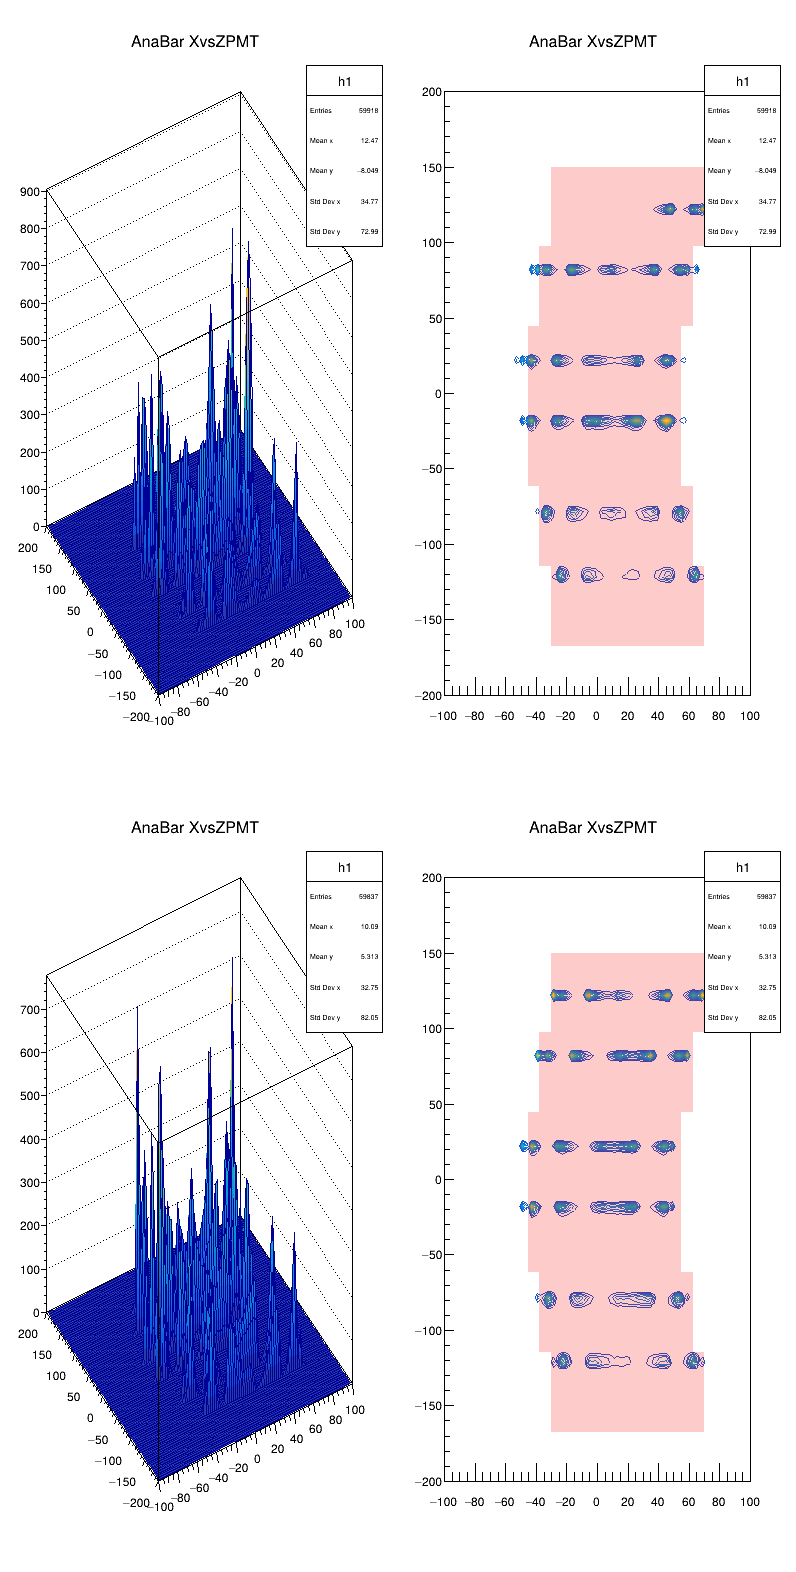

In [12]:
hAnaBarXZPMT1 = fdft1.Histo2D(("h1","AnaBar XvsZPMT",100,-100.0,100.0,100,-200,200),"anaBarXPMT","anaBarZPMT")
hAnaBarXZPMT2 = fdft2.Histo2D(("h1","AnaBar XvsZPMT",100,-100.0,100.0,100,-200,200),"anaBarXPMT","anaBarZPMT")

c34 = root.TCanvas("c34","c34",800,1600)
c34.Divide(2,2,0.01,0.01,0)

c34.cd(1)
hAnaBarXZPMT1.Draw("SURF1")

c34.cd(2)
hAnaBarXZPMT1.Draw("CONT1")
plotDetector(hAnaBarXZPMT1)
#plotSinglePoints(hAnaBarXZPMT);

c34.cd(3)
hAnaBarXZPMT2.Draw("SURF1")

c34.cd(4)
hAnaBarXZPMT2.Draw("CONT1")
plotDetector(hAnaBarXZPMT2)
#plotSinglePoints(hAnaBarXZPMT);
                  
c34.Print("plots/c34RA.pdf");

Number of entries AnaBar PMT Number of Photons GEANT4 v10: 109537.0
Number of entries AnaBar PMT Number of Photons GEANT4 v11: 108776.0


Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Info in <TCanvas::Print>: pdf file plots/c4RA.pdf has been created


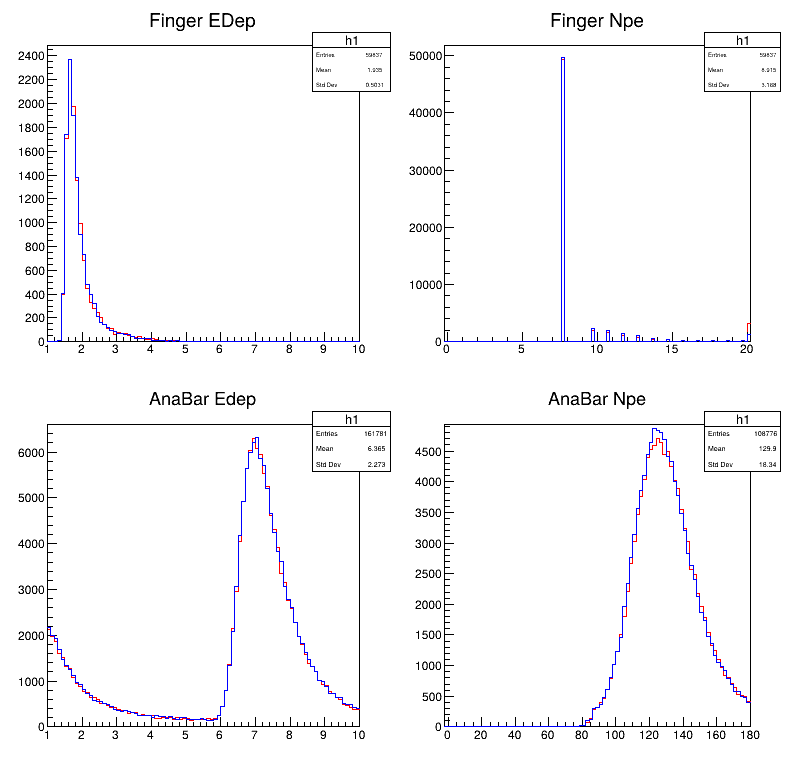

In [13]:
# Canvas 4

hFingerEd1 = fdft1.Histo1D(("h1", "Finger EDep", 100, 0.0, 10.0),'fingerEd')
hFingerPMTNphot1 = fdft1.Histo1D(("h1", "Finger Npe", 100, 0.0, 20.0),'fingerPMTNPhotons')
hAnaBarPMTNphot1 = fdft1.Histo1D(("h1", "AnaBar Npe", 100, 0.0, 200.0),'anaBarPMTNPhotons')
hAnaBarEd1 = fdft1.Histo1D(("h1", "AnaBar Edep", 100, 0.0, 10.0),'anaBarEd')

hFingerEd2 = fdft2.Histo1D(("h1", "Finger EDep", 100, 0.0, 10.0),'fingerEd')
hFingerPMTNphot2 = fdft2.Histo1D(("h1", "Finger Npe", 100, 0.0, 20.0),'fingerPMTNPhotons')
hAnaBarPMTNphot2 = fdft2.Histo1D(("h1", "AnaBar Npe", 100, 0.0, 200.0),'anaBarPMTNPhotons')
hAnaBarEd2 = fdft2.Histo1D(("h1", "AnaBar Edep", 100, 0.0, 10.0),'anaBarEd')

c4 = root.TCanvas("c4","c4",800,800)

c4.cd()
pad = root.TPad("pad","pad",0.01,0.51,0.50,0.99)
pad.Draw()
pad.cd()
hFingerEd2.SetLineColor(2)
hFingerEd2.GetXaxis().SetRangeUser(1.0,10)
hFingerEd2.Draw();
hFingerEd1.SetLineColor(4)
hFingerEd1.GetXaxis().SetRangeUser(1.0,10)
hFingerEd1.Draw("SAME");

c4.cd()
pad = root.TPad("pad","pad",0.51,0.51,0.99,0.99)
pad.Draw()
pad.cd()
hFingerPMTNphot2.SetLineColor(2)
hFingerPMTNphot2.GetXaxis().SetRangeUser(-10,250)
hFingerPMTNphot2.Draw()
hFingerPMTNphot1.SetLineColor(4)
hFingerPMTNphot1.GetXaxis().SetRangeUser(-10,250)
hFingerPMTNphot1.Draw("SAME")

c4.cd()
pad = root.TPad("pad","pad",0.01,0.01,0.50,0.50)
#pad.SetLogy()
pad.Draw()
pad.cd()
hAnaBarEd2.SetLineColor(2)
hAnaBarEd2.GetXaxis().SetRangeUser(1.0,10)
hAnaBarEd2.Draw();
hAnaBarEd1.SetLineColor(4)
hAnaBarEd1.GetXaxis().SetRangeUser(1.0,10)
hAnaBarEd1.Draw("SAME");

c4.cd()
pad = root.TPad("pad","pad",0.51,0.01,0.99,0.50)
#pad.SetLogy()
pad.Draw()
pad.cd()
hAnaBarPMTNphot2.SetLineColor(2)
hAnaBarPMTNphot2.GetXaxis().SetRangeUser(-20,180)
hAnaBarPMTNphot2.Draw()
hAnaBarPMTNphot1.SetLineColor(4)
hAnaBarPMTNphot1.GetXaxis().SetRangeUser(-20,180)
hAnaBarPMTNphot1.Draw("SAME")

print(f"Number of entries AnaBar PMT Number of Photons GEANT4 v10: {hAnaBarPMTNphot1.GetEntries()}")
print(f"Number of entries AnaBar PMT Number of Photons GEANT4 v11: {hAnaBarPMTNphot2.GetEntries()}")

c4.Draw()
c4.Print("plots/c4RA.pdf")

Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ulast > fXmax, fXmax is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Warning in <TAxis::TAxis::SetRangeUser>: ufirst < fXmin, fXmin is used
Info in <TCanvas::Print>: pdf file plots/c4RA.pdf has been created


In [14]:
# Canvas 5

hAnaBarX1 = fdft1.Histo1D(("h1", "AnaBar X", 1000, -800.0, 800.0),'anaBarXVec')
hAnaBarY1 = fdft1.Histo1D(("h1", "AnaBar Y", 1000, -400.0, 100.0),'anaBarYVec')
hAnaBarZ1 = fdft1.Histo1D(("h1", "AnaBar Z", 1000, -2000.0, 2000.0),'anaBarZVec')
hAnaBarT1 = fdft1.Histo1D(("h1", "AnaBar T", 1000, 0.0, 10.0),'anaBarTVec')
hAnaBarX2 = fdft2.Histo1D(("h1", "AnaBar X", 1000, -800.0, 800.0),'anaBarXVec')
hAnaBarY2 = fdft2.Histo1D(("h1", "AnaBar Y", 1000, -400.0, 100.0),'anaBarYVec')
hAnaBarZ2 = fdft2.Histo1D(("h1", "AnaBar Z", 1000, -2000.0, 2000.0),'anaBarZVec')
hAnaBarT2 = fdft2.Histo1D(("h1", "AnaBar T", 1000, 0.0, 10.0),'anaBarTVec')

c5 = root.TCanvas("c5","c5",800,800)
c5.Divide(2,2,0.01,0.01,0)

c5.cd(1)
hAnaBarX2.Draw()
c5.cd(2)
hAnaBarY2.Draw()
c5.cd(3)
hAnaBarZ2.Draw()
c5.cd(4)
hAnaBarT2.Draw()
c5.cd(1)
hAnaBarX1.Draw("SAME")
c5.cd(2)
hAnaBarY1.Draw("SAME")
c5.cd(3)
hAnaBarZ1.Draw("SAME")
c5.cd(4)
hAnaBarT1.Draw("SAME")


print(f"Number of entries AnaBarX1 GEANT4 v10: {hAnaBarX1.GetEntries()}")
print(f"Number of entries AnaBarX2 GEANT4 v11: {hAnaBarX2.GetEntries()}")

Number of entries AnaBarX1 GEANT4 v10: 1592403.0
Number of entries AnaBarX2 GEANT4 v11: 2851603.0


Info in <TCanvas::Print>: pdf file plots/c5RA.pdf has been created


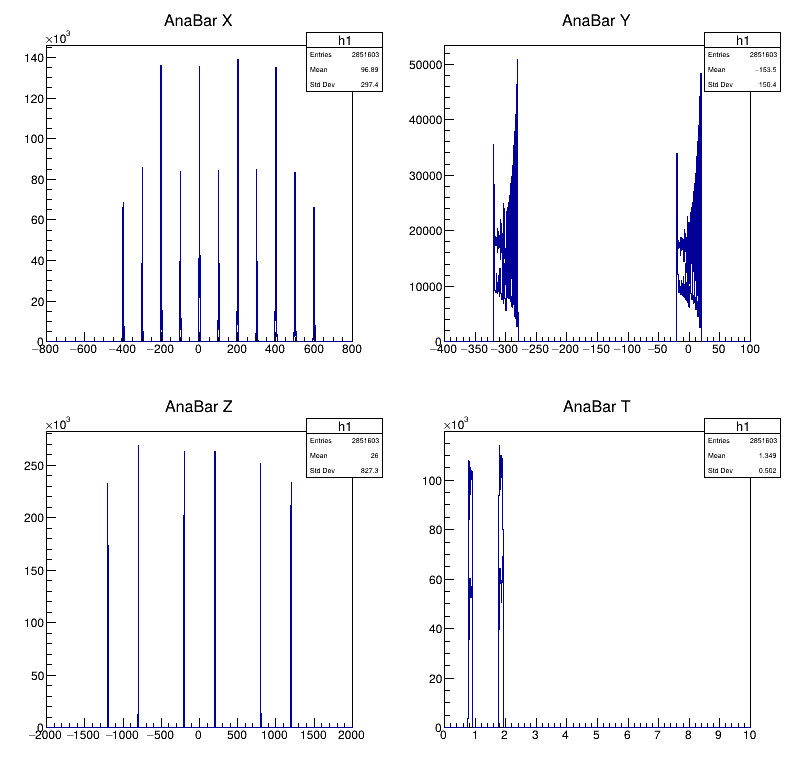

In [15]:
c5.Draw()
c5.Print("plots/c5RA.pdf");

Info in <TCanvas::Print>: pdf file plots/c6RA.pdf has been created


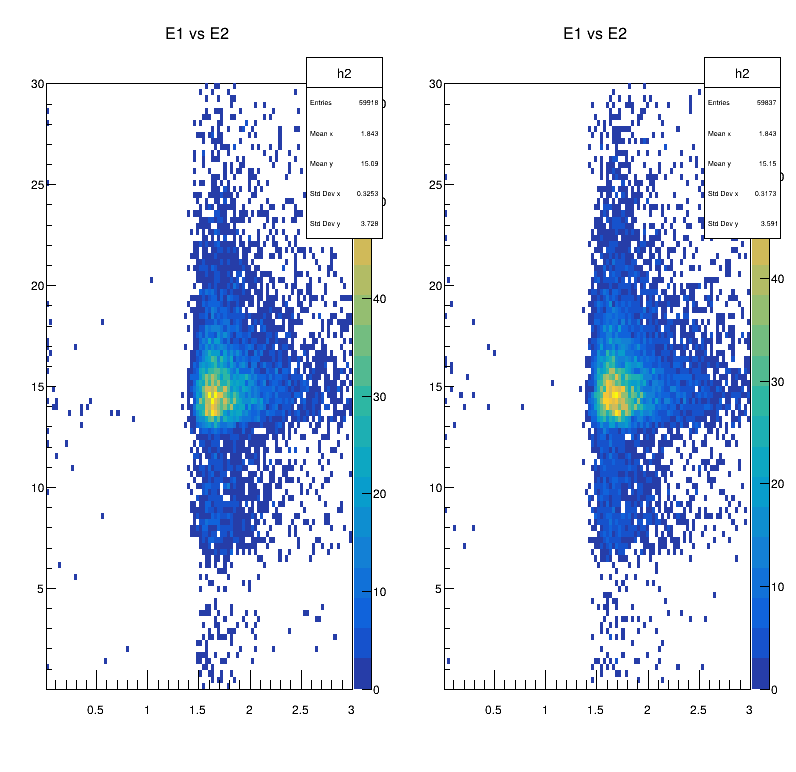

In [16]:
hE1vsE21 = fdft1.Histo2D(("h2", "E1 vs E2", 100, 0.01, 3.0, 100, 0.01, 30.0),"fingerEd","anaBarEdTotal")
hE1vsE22 = fdft2.Histo2D(("h2", "E1 vs E2", 100, 0.01, 3.0, 100, 0.01, 30.0),"fingerEd","anaBarEdTotal")

c6 = root.TCanvas("c6", "c6", 800, 800)
c6.Divide(2,1, 0.01, 0.01, 0)

c6.cd(1)
hE1vsE21.Draw("COLZ")
c6.cd(2)
hE1vsE22.Draw("COLZ")

c6.Draw()
c6.Print("plots/c6RA.pdf")

In [17]:
hFinger_Edep_vs_Nphot1 = fdft1.Filter("trigger2").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 200.0, 100, 0.01, 3.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_Nphot1 = fdft1.Filter("trigger2").Histo2D(("h4", "AnaBar Edep vs NphotTotal", 100, 0.01, 30.0, 100, 0.01, 500.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot1 = fdft1.Filter("trigger2").Histo2D(("h5", "AnaBar NphotTotal vs Finger Nphot", 100, 0.01, 500.0, 100, 0.01, 200.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")
hFinger_Edep_vs_Nphot2 = fdft2.Filter("trigger2").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 200.0, 100, 0.01, 3.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_Nphot2 = fdft2.Filter("trigger2").Histo2D(("h4", "AnaBar Edep vs NphotTotal", 100, 0.01, 30.0, 100, 0.01, 500.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot2 = fdft2.Filter("trigger2").Histo2D(("h5", "AnaBar NphotTotal vs Finger Nphot", 100, 0.01, 500.0, 100, 0.01, 200.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")

c7 = root.TCanvas("c7", "c7", 800, 800)
c7.Divide(4,2, 0.01, 0.01, 0)

#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c7.cd(1)
hFinger_Edep_vs_Nphot1.Draw("COLZ")
c7.cd(2)
hAnaBar_Edep_vs_Nphot1.Draw("COLZ")
c7.cd(3)
hNphot0_vs_Nphot1.Draw("COLZ")
c7.cd(4)
prof = hAnaBar_Edep_vs_Nphot1.ProfileX()
prof.Fit("pol1")
c7.cd(5)
hFinger_Edep_vs_Nphot2.Draw("COLZ")
c7.cd(6)
hAnaBar_Edep_vs_Nphot2.Draw("COLZ")
c7.cd(7)
hNphot0_vs_Nphot2.Draw("COLZ")
c7.cd(8)
prof = hAnaBar_Edep_vs_Nphot2.ProfileX()
prof.Fit("pol1")

****************************************
Minimizer is Linear / Migrad
Chi2                      =      21367.1
NDf                       =           82
p0                        =     -11.7564   +/-   0.410023    
p1                        =      17.3609   +/-   0.0303776   
****************************************
Minimizer is Linear / Migrad
Chi2                      =      22380.3
NDf                       =           84
p0                        =      7.63533   +/-   0.0617251   
p1                        =      16.1088   +/-   0.0124487   


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c7RA.pdf has been created


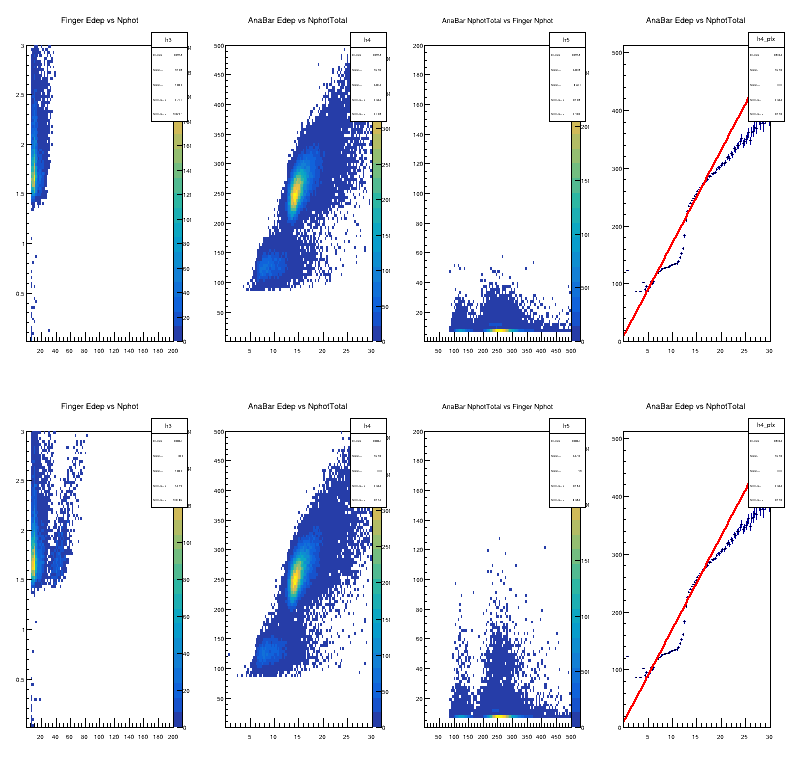

In [18]:
c7.Draw()
c7.Print("plots/c7RA.pdf")

In [19]:
hFinger_Edep_vs_Nphot1b = fdft1.Filter("trigger3").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 200.0, 100, 0.01, 3.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_Nphot1b = fdft1.Filter("trigger3").Histo2D(("h4", "AnaBar Edep vs NphotTotal", 100, 0.01, 30.0, 100, 0.01, 500.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot1b = fdft1.Filter("trigger3").Histo2D(("h5", "AnaBar NphotTotal vs Finger Nphot", 100, 0.01, 500.0, 100, 0.01, 200.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")
hFinger_Edep_vs_Nphot2b = fdft2.Filter("trigger3").Histo2D(("h3", "Finger Edep vs Nphot", 100, 0.01, 200.0, 100, 0.01, 3.0),"fingerPMTNPhotons","fingerEd")
hAnaBar_Edep_vs_Nphot2b = fdft2.Filter("trigger3").Histo2D(("h4", "AnaBar Edep vs NphotTotal", 100, 0.01, 30.0, 100, 0.01, 500.0),"anaBarEdTotal","anaBarNPhotonsTotal")
hNphot0_vs_Nphot2b = fdft2.Filter("trigger3").Histo2D(("h5", "AnaBar NphotTotal vs Finger Nphot", 100, 0.01, 500.0, 100, 0.01, 200.0),"anaBarNPhotonsTotal","fingerPMTNPhotons")

c8 = root.TCanvas("c8", "c8", 800, 800)
c8.Divide(4,2, 0.01, 0.01, 0)

#c7PE_MeV = root.TCanvas("c7PE_MeV", "c7PE_MeV", 800,800)
#c7Profile = root.TCanvas("c7Profile", "c7Profile", 800,800)

c8.cd(1)
hFinger_Edep_vs_Nphot1b.Draw("COLZ")
c8.cd(2)
hAnaBar_Edep_vs_Nphot1b.Draw("COLZ")
c8.cd(3)
hNphot0_vs_Nphot1b.Draw("COLZ")
c8.cd(4)
prof = hAnaBar_Edep_vs_Nphot1b.ProfileX()
prof.Fit("pol1")
c8.cd(5)
hFinger_Edep_vs_Nphot2b.Draw("COLZ")
c8.cd(6)
hAnaBar_Edep_vs_Nphot2b.Draw("COLZ")
c8.cd(7)
hNphot0_vs_Nphot2b.Draw("COLZ")
c8.cd(8)
prof = hAnaBar_Edep_vs_Nphot2b.ProfileX()
prof.Fit("pol1")

****************************************
Minimizer is Linear / Migrad
Chi2                      =      21367.1
NDf                       =           82
p0                        =     -11.7564   +/-   0.410023    
p1                        =      17.3609   +/-   0.0303776   
****************************************
Minimizer is Linear / Migrad
Chi2                      =      22380.3
NDf                       =           84
p0                        =      7.63533   +/-   0.0617251   
p1                        =      16.1088   +/-   0.0124487   


Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResult is empty - use the fit option S
Error in <TFitResultPtr>: TFitResu

Info in <TCanvas::Print>: pdf file plots/c8RA.pdf has been created


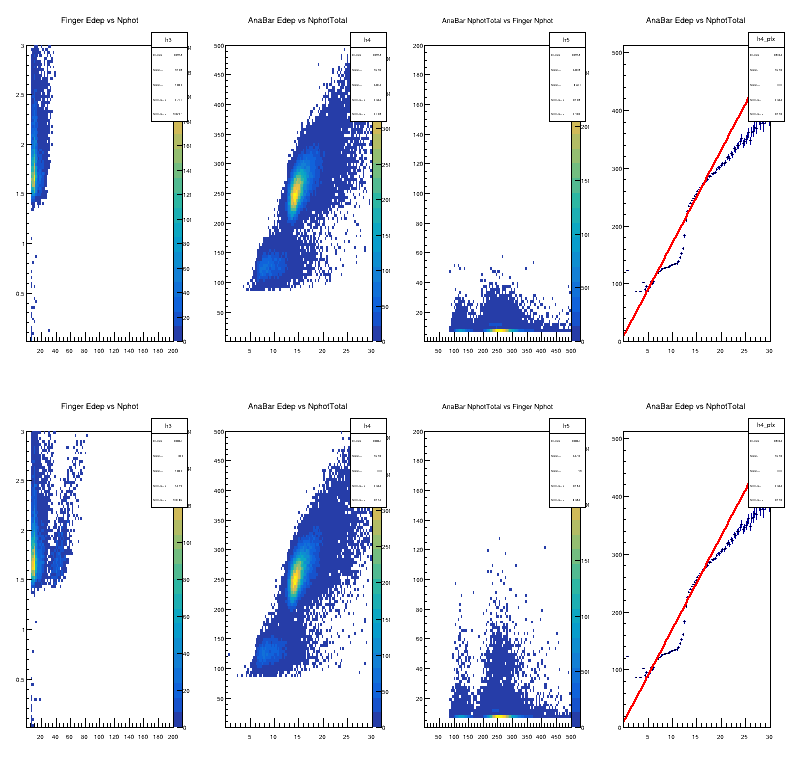

In [20]:
c8.Draw()
c8.Print("plots/c8RA.pdf")

In [21]:
#NUMPADDLE=14
#
#hAnaBarEdAll = []
#
#for i in range(NUMPADDLE):
#    name = ("AnaBarEd%d" % i)
#    title = ("AnaBar Energy Deposited A%d" % i)
#    name2 = ("anaBarEd[%d]" %i)
#    hAnaBarEdAll.append(fdft.Define(name,name2).Filter("trigger3").Histo1D((name, title, 100, 0.01, 10.0),name))
#    
#hAnaBarEdAllCut = []
#
#for i in range(NUMPADDLE):
#    name = ("AnaBarEd%dCut" % i)
#    title = ("AnaBar Energy Deposited A%d" % i)
#    name2 = ("anaBarEd[%d]" %i)
#    name3 = ("trigger3 && anaBarPMTNPhotons[%d]>100.0" % i)
#    hAnaBarEdAllCut.append(fdft.Define(name,name2).Filter(name3).Histo1D((name, title, 100, 0.01, 10.0),name))
#
#cEd = root.TCanvas("cEd", "cEd", 800,800)
#cEd.Divide(4,4)
#
#means = []
#meanErr = []
#
#start = 5.5
#gf = root.TF1("gf", "gaus", start, 10.0)
#
#for i in range(NUMPADDLE):
#    
#    print ("Paddle = ",i+1)
#
#    cEd.cd(i+1)
#    
#    hAnaBarEdAll[i].Draw()
#    hAnaBarEdAllCut[i].SetLineColor(2)
#    hAnaBarEdAllCut[i].Draw("SAME")
#    
#cEd.Draw()
#cEd.Print("plots/cEdRA.pdf")

In [22]:
#hAnaBarPMTNphotArray = []
#
#for i in range(NUMPADDLE):  
#    name = ("AnaBarPMTNphotA%d" % i)
#    title = ("AnaBar_PMT_Number_of_Photons_A%d" % i)
#    name2 = ("anaBarPMTNPhotons[%d]" % i)
#    hAnaBarPMTNphotArray.append(fdft.Define(name,name2).Filter("trigger").Histo1D((name, title, 200, -20, 180.0),name))
#    
#hAnaBarPMTNphotCut = []
#    
#for i in range(NUMPADDLE):  
#    name = ("AnaBarPMTNphotA%dCut" % i)
#    title = ("AnaBar_PMT_Number_of_Photons_A%d_Cut" % i)
#    name2 = ("anaBarPMTNPhotons[%d]" % i)
#    hAnaBarPMTNphotCut.append(fdft.Define(name,name2).Filter("trigger3").Histo1D((name, title, 200, -20, 180.0),name))
#    
#hAnaBarPMTNoiseCutNphot = []
#
#for i in range(NUMPADDLE):
#    name = ("AnaBarPMTNoiseCutNphotA%d" % i)
#    title = ("AnaBar PMT Number of Photons A%d" % i)
#    name2 = ("anaBarPMTNPhotons[%d]" % i)
#    name3 = ("trigger3 && anaBarEd[%d]>4.0" % i)
#    hAnaBarPMTNoiseCutNphot.append(fdft.Define(name,name2).Filter(name3).Histo1D((name, title, 200, -20, 180.0),name))
#
#c9 = root.TCanvas("c9", "c9", 800,800)
#
#print("Fitting ...\n")
#fr = [float, float]
#fp, fpe = [float, float, float, float], [float, float, float, float]
#pllo = [0.05, 0.5, 1.0, 0.04]
#plhi = [10.0, 50.0, 10000.0, 5.0]
#sv = [1.8, 5.0, 1400.0, 3.0]
#chisqr = float
#ndf = int
#SNRPeak, SNRFWHM = float, float
#
#
#for i in range(NUMPADDLE):
#        c9.cd()
#        xl = 0.25*(i%4)
#        xh = 0.25*(i%4)+0.25
#        yl = 0.75 - 0.25*int(i/4)
#        yh = 0.75 - 0.25*int(i/4) + 0.25
#        #print (i,xl,yl,xh,yh)
#        pad = root.TPad("pad","pad",xl,yl,xh,yh)
#        pad.SetLogy(True)
#        pad.Draw()
#        pad.cd()
#        hAnaBarPMTNphotArray[i].Draw()
#        hAnaBarPMTNoiseCutNphot[i].SetLineColor(2)
#        hAnaBarPMTNoiseCutNphot[i].Draw("SAME")
#        #hAnaBarPMTNoiseCutNphot[i].Fit("gaus")

In [23]:
#c9.Draw()
#c9.Print("plots/c9RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c11RA.pdf has been created


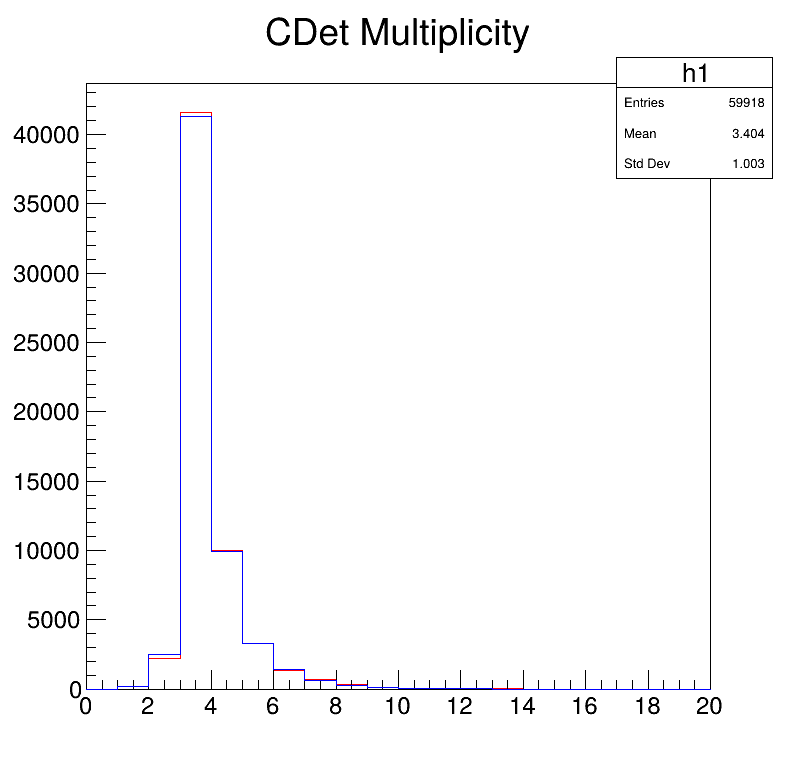

In [24]:
hAnaBarMult1 = fdft1.Histo1D(("h1", "CDet Multiplicity", 20, 0, 20),"imult")
hAnaBarMult2 = fdft2.Histo1D(("h1", "CDet Multiplicity", 20, 0, 20),"imult")

c11 = root.TCanvas("c11", "c11", 800,800)
c11.Divide(1,1, 0.01, 0.01, 0)

c11.cd(1)
# set histogram color
hAnaBarMult1.SetLineColor(2)
hAnaBarMult1.Draw()
hAnaBarMult2.SetLineColor(4)
hAnaBarMult2.Draw("SAME")

c11.Draw()
c11.Print("plots/c11RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c12RA.pdf has been created


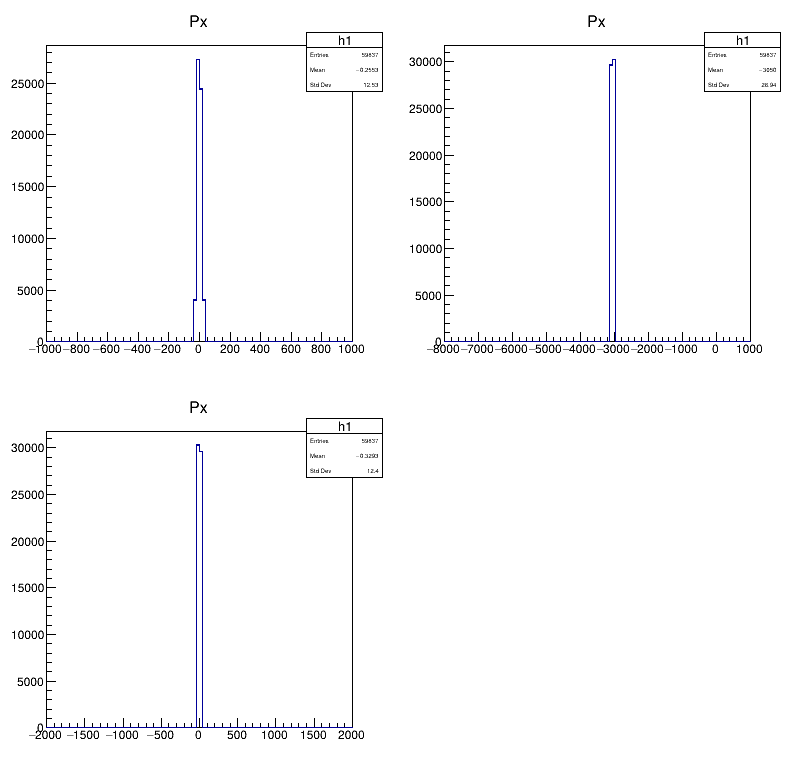

In [25]:
hPrimPx1 = fdft1.Histo1D(("h1", "Px", 100, -1000, 1000),"fPx")
hPrimPy1 = fdft1.Histo1D(("h1", "Px", 100, -8000, 1000),"fPy")
hPrimPz1 = fdft1.Histo1D(("h1", "Px", 100, -2000, 2000),"fPz")
hPrimPx2 = fdft2.Histo1D(("h1", "Px", 100, -1000, 1000),"fPx")
hPrimPy2 = fdft2.Histo1D(("h1", "Px", 100, -8000, 1000),"fPy")
hPrimPz2 = fdft2.Histo1D(("h1", "Px", 100, -2000, 2000),"fPz")

c12 = root.TCanvas("c12", "c12", 800,800)
c12.Divide(2,2, 0.01, 0.01, 0)

c12.cd(1)
hPrimPx2.Draw()
c12.cd(2)
hPrimPy2.Draw()
c12.cd(3)
hPrimPz2.Draw()
c12.cd(1)
hPrimPx1.Draw("SAME")
c12.cd(2)
hPrimPy1.Draw("SAME")
c12.cd(3)
hPrimPz1.Draw("SAME")

c12.Draw()
c12.Print("plots/c12RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c12RA.pdf has been created


Info in <TCanvas::Print>: pdf file plots/c13RA.pdf has been created


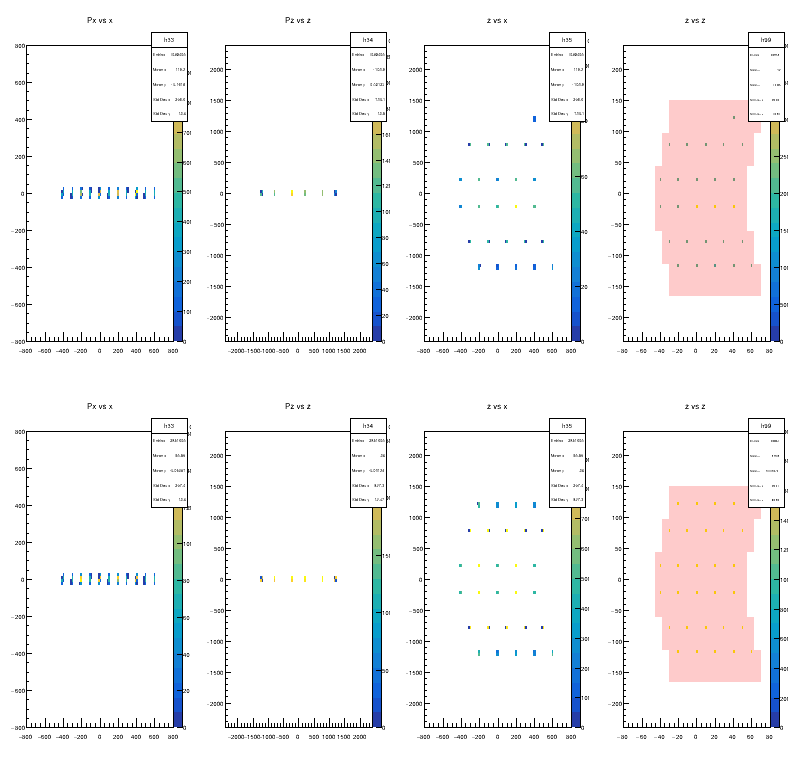

In [26]:
hPx_vs_x1 = fdft1.Filter("trigger2").Histo2D(("h33", "Px vs x", 100, -800.0, 800.0, 100, -800.0, 800.0),"anaBarXVec","fPx")
hPz_vs_z1 = fdft1.Filter("trigger2").Histo2D(("h34", "Pz vs z", 100, -2400.0, 2400.0, 100, -2400.0, 2400.0),"anaBarZVec","fPz")
hz_vs_x1 = fdft1.Filter("trigger2").Histo2D(("h35", "z vs x", 100, -800.0, 800.0, 100, -2400.0, 2400.0),"anaBarXVec","anaBarZVec")
hPx_vs_x2 = fdft2.Filter("trigger2").Histo2D(("h33", "Px vs x", 100, -800.0, 800.0, 100, -800.0, 800.0),"anaBarXVec","fPx")
hPz_vs_z2 = fdft2.Filter("trigger2").Histo2D(("h34", "Pz vs z", 100, -2400.0, 2400.0, 100, -2400.0, 2400.0),"anaBarZVec","fPz")
hz_vs_x2 = fdft2.Filter("trigger2").Histo2D(("h35", "z vs x", 100, -800.0, 800.0, 100, -2400.0, 2400.0),"anaBarXVec","anaBarZVec")

hPrimXZ1 = fdft1.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z")
hPrimXZ2 = fdft2.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z")

c13 = root.TCanvas("c13", "c13", 800, 800)
c13.Divide(4,2, 0.01, 0.01, 0)

c13.cd(1)
hPx_vs_x1.Draw("COLZ")
c13.cd(2)
hPz_vs_z1.Draw("COLZ")
c13.cd(3)
hz_vs_x1.Draw("COLZ")
c13.cd(4)
plotDetector(hPrimXZ1);
hPrimXZ1.Draw('COLZ')

c13.cd(5)
hPx_vs_x2.Draw("COLZ")
c13.cd(6)
hPz_vs_z2.Draw("COLZ")
c13.cd(7)
hz_vs_x2.Draw("COLZ")
c13.cd(8)
plotDetector(hPrimXZ2);
hPrimXZ2.Draw('COLZ')


c13.Draw()
c13.Print("plots/c13RA.pdf")

Info in <TCanvas::Print>: pdf file plots/c14RA.pdf has been created


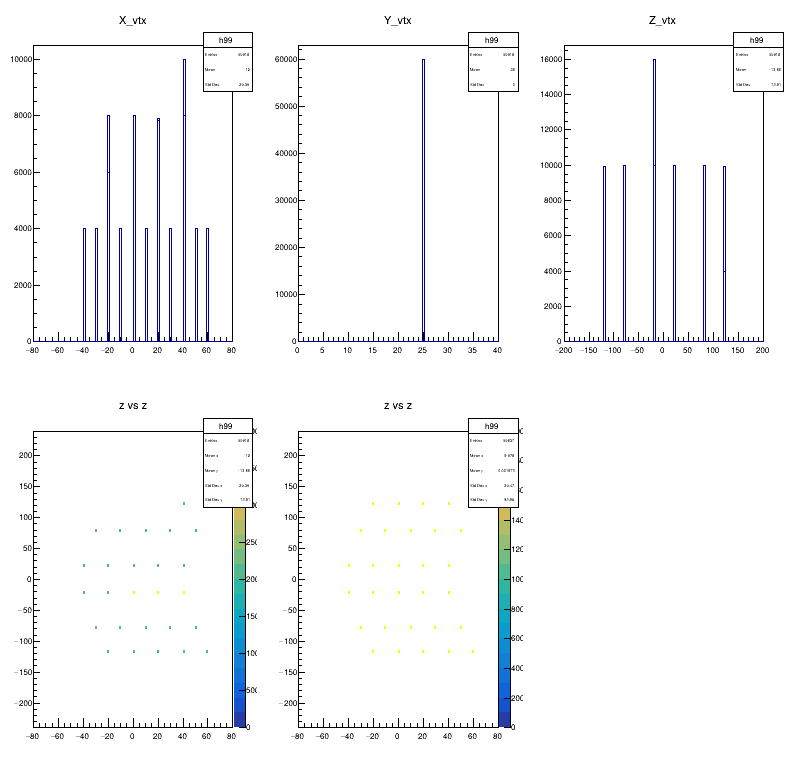

In [27]:
hPrimX1 = fdft1.Histo1D(("h99","X_vtx", 100, -80,80),"Prim_X")
hPrimY1 = fdft1.Histo1D(("h99","Y_vtx", 100, 0,40),"Prim_Y")
hPrimZ1 = fdft1.Histo1D(("h99","Z_vtx", 100, -200,200),"Prim_Z")
hPrimXZ1 = fdft1.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z")
hPrimX2 = fdft2.Histo1D(("h99","X_vtx", 100, -80,80),"Prim_X")
hPrimY2 = fdft2.Histo1D(("h99","Y_vtx", 100, 0,40),"Prim_Y")
hPrimZ2 = fdft2.Histo1D(("h99","Z_vtx", 100, -200,200),"Prim_Z")
hPrimXZ2 = fdft2.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z")

c14 = root.TCanvas("c14","c14",800,800)
c14.Divide(3,2,0.01,0.01,0)

c14.cd(1);
hPrimX1.Draw();
c14.cd(2); 
hPrimY1.Draw();
c14.cd(3);
hPrimZ1.Draw();
c14.cd(4);
hPrimXZ1.Draw("COLZ");
c14.cd(1);
hPrimX2.Draw("SAME");
c14.cd(2);
hPrimY2.Draw("SAME");
c14.cd(3);
hPrimZ2.Draw("SAME");
c14.cd(5);
hPrimXZ2.Draw("COLZ");

c14.Draw();
c14.Print("plots/c14RA.pdf");

Info in <TCanvas::Print>: pdf file plots/c15RA.pdf has been created


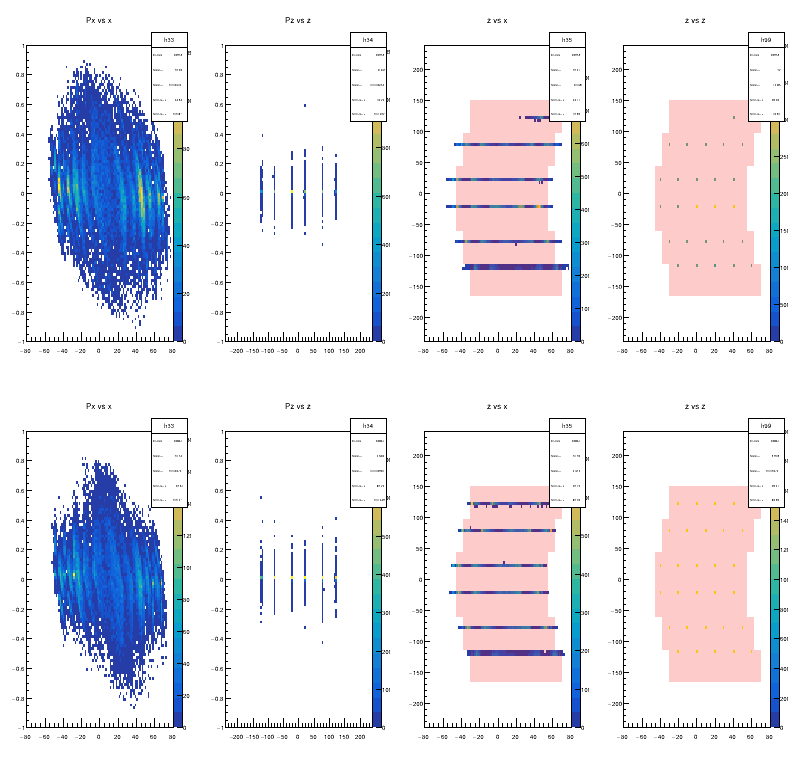

In [28]:
hPx_vs_x1 = fdft1.Filter("trigger2").Histo2D(("h33", "Px vs x", 100, -80.0, 80.0, 100, -1.0, 1.0),"anaBarXPMT","anaBarPXPMT");
hPz_vs_z1 = fdft1.Filter("trigger2").Histo2D(("h34", "Pz vs z", 100, -240.0, 240.0, 100, -1.0, 1.0),"anaBarZPMT","anaBarPZPMT");
hz_vs_x1 = fdft1.Filter("trigger2").Histo2D(("h35", "z vs x", 100, -80.0, 80.0, 100, -240.0, 240.0),"anaBarXPMT","anaBarZPMT");
hPrimXZ1 = fdft1.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z");
hPx_vs_x2 = fdft2.Filter("trigger2").Histo2D(("h33", "Px vs x", 100, -80.0, 80.0, 100, -1.0, 1.0),"anaBarXPMT","anaBarPXPMT");
hPz_vs_z2 = fdft2.Filter("trigger2").Histo2D(("h34", "Pz vs z", 100, -240.0, 240.0, 100, -1.0, 1.0),"anaBarZPMT","anaBarPZPMT");
hz_vs_x2 = fdft2.Filter("trigger2").Histo2D(("h35", "z vs x", 100, -80.0, 80.0, 100, -240.0, 240.0),"anaBarXPMT","anaBarZPMT");
hPrimXZ2 = fdft2.Histo2D(("h99", "z vs z", 100, -80.0, 80.0, 100, -240.0, 240.0),"Prim_X","Prim_Z");



c15 = root.TCanvas("c15","c15",800,800);
c15.Divide(4,2,0.01,0.01,0);

c15.cd(1);
hPx_vs_x1.Draw("COLZ");
c15.cd(2);
hPz_vs_z1.Draw("COLZ");
c15.cd(3);
hz_vs_x1.Draw("COLZ");
plotDetector(hz_vs_x1);
c15.cd(4);
hPrimXZ1.Draw("COLZ");
plotDetector(hPrimXZ1);

c15.cd(5);
hPx_vs_x2.Draw("COLZ");
c15.cd(6);
hPz_vs_z2.Draw("COLZ");
c15.cd(7);
hz_vs_x2.Draw("COLZ");
plotDetector(hz_vs_x2);
c15.cd(8);
hPrimXZ2.Draw("COLZ");
plotDetector(hPrimXZ2);

c15.Draw();
c15.Print("plots/c15RA.pdf");

Info in <TCanvas::Print>: pdf file plots/c16RA.pdf has been created


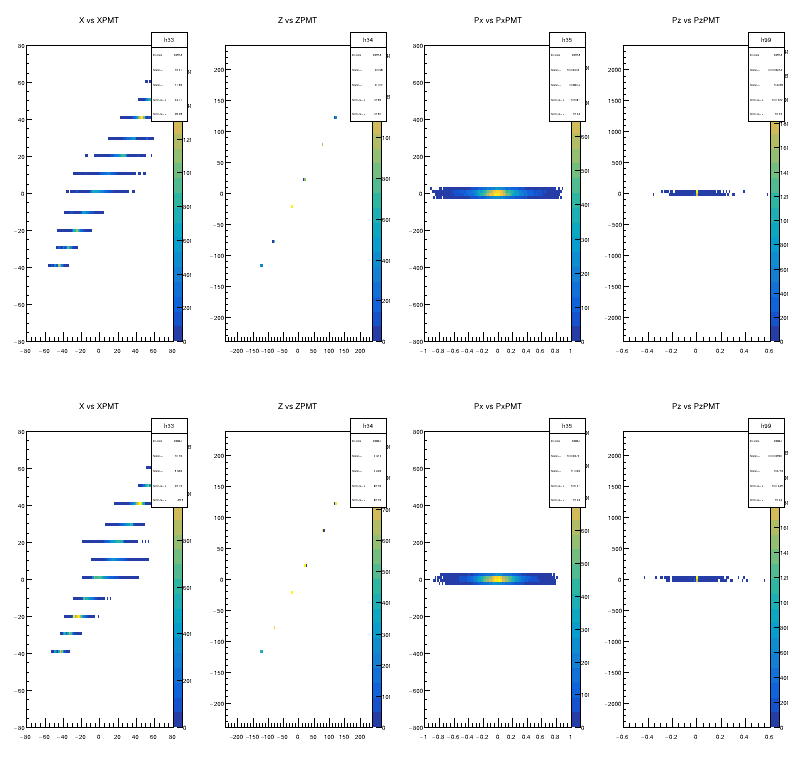

In [29]:
hx_vs_x1 = fdft1.Filter("trigger2").Histo2D(("h33", "X vs XPMT", 100, -80.0, 80.0, 100, -80.0, 80.0),"anaBarXPMT","Prim_X");
hz_vs_z1 = fdft1.Filter("trigger2").Histo2D(("h34", "Z vs ZPMT", 100, -240.0, 240.0, 100, -240.0, 240.0),"anaBarZPMT","Prim_Z");
hPx_vs_Px1 = fdft1.Filter("trigger2").Histo2D(("h35", "Px vs PxPMT", 100, -1.0, 1.0, 100, -800.0, 800.0),"anaBarPXPMT","fPx");
hPz_vs_Pz1 = fdft1.Filter("trigger2").Histo2D(("h99", "Pz vs PzPMT", 100, -0.6, 0.6, 100, -2400.0, 2400.0),"anaBarPZPMT","fPz");
hx_vs_x2 = fdft2.Filter("trigger2").Histo2D(("h33", "X vs XPMT", 100, -80.0, 80.0, 100, -80.0, 80.0),"anaBarXPMT","Prim_X");
hz_vs_z2 = fdft2.Filter("trigger2").Histo2D(("h34", "Z vs ZPMT", 100, -240.0, 240.0, 100, -240.0, 240.0),"anaBarZPMT","Prim_Z");
hPx_vs_Px2 = fdft2.Filter("trigger2").Histo2D(("h35", "Px vs PxPMT", 100, -1.0, 1.0, 100, -800.0, 800.0),"anaBarPXPMT","fPx");
hPz_vs_Pz2 = fdft2.Filter("trigger2").Histo2D(("h99", "Pz vs PzPMT", 100, -0.6, 0.6, 100, -2400.0, 2400.0),"anaBarPZPMT","fPz");

c16 = root.TCanvas("c16","c16",800,800);
c16.Divide(4,2,0.01,0.01,0);

c16.cd(1);
hx_vs_x1.Draw("COLZ");
c16.cd(2);
hz_vs_z1.Draw("COLZ");
c16.cd(3);
hPx_vs_Px1.Draw("COLZ");
c16.cd(4);
hPz_vs_Pz1.Draw("COLZ");
c16.cd(5);
hx_vs_x2.Draw("COLZ");
c16.cd(6);
hz_vs_z2.Draw("COLZ");
c16.cd(7);
hPx_vs_Px2.Draw("COLZ");
c16.cd(8);
hPz_vs_Pz2.Draw("COLZ");

c16.Draw();
c16.Print("plots/c16RA.pdf");

In [30]:
t.stop()

Elapsed time: 103.3200 seconds
